In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

In [2]:
experiments = {
    'BrushlessMotor': {
        '790':
        {
            'conv_end_to_end': 'experiments/BrushlessMotor-sync_head_conv-False-True-0.5',
            'conv_pretrained': 'experiments/BrushlessMotor-sync_head_conv-True-False-0.5',
            'spline': 'experiments/BrushlessMotor-resample_spline-False-False-0.5'
        },
        '1537':
        {
            'conv_end_to_end': 'experiments/BrushlessMotor-sync_head_conv-False-True-1',
            'conv_pretrained': 'experiments/BrushlessMotor-sync_head_conv-True-False-1',
            'spline': 'experiments/BrushlessMotor-resample_spline-False-False-1'
        }
    }
}
AUC = {}
for machine, machine_experiments in experiments.items():
    AUC[machine] = {}
    for window_length, model_paths in machine_experiments.items():
        AUC[machine][window_length] = {}
        for model, path in model_paths.items():
            df = pd.read_csv(
                f'{path}/AUC_results.csv')
            df.columns = ["SensorName", "Overall", "Source", "Target"]
            AUC[machine][window_length][model] = df

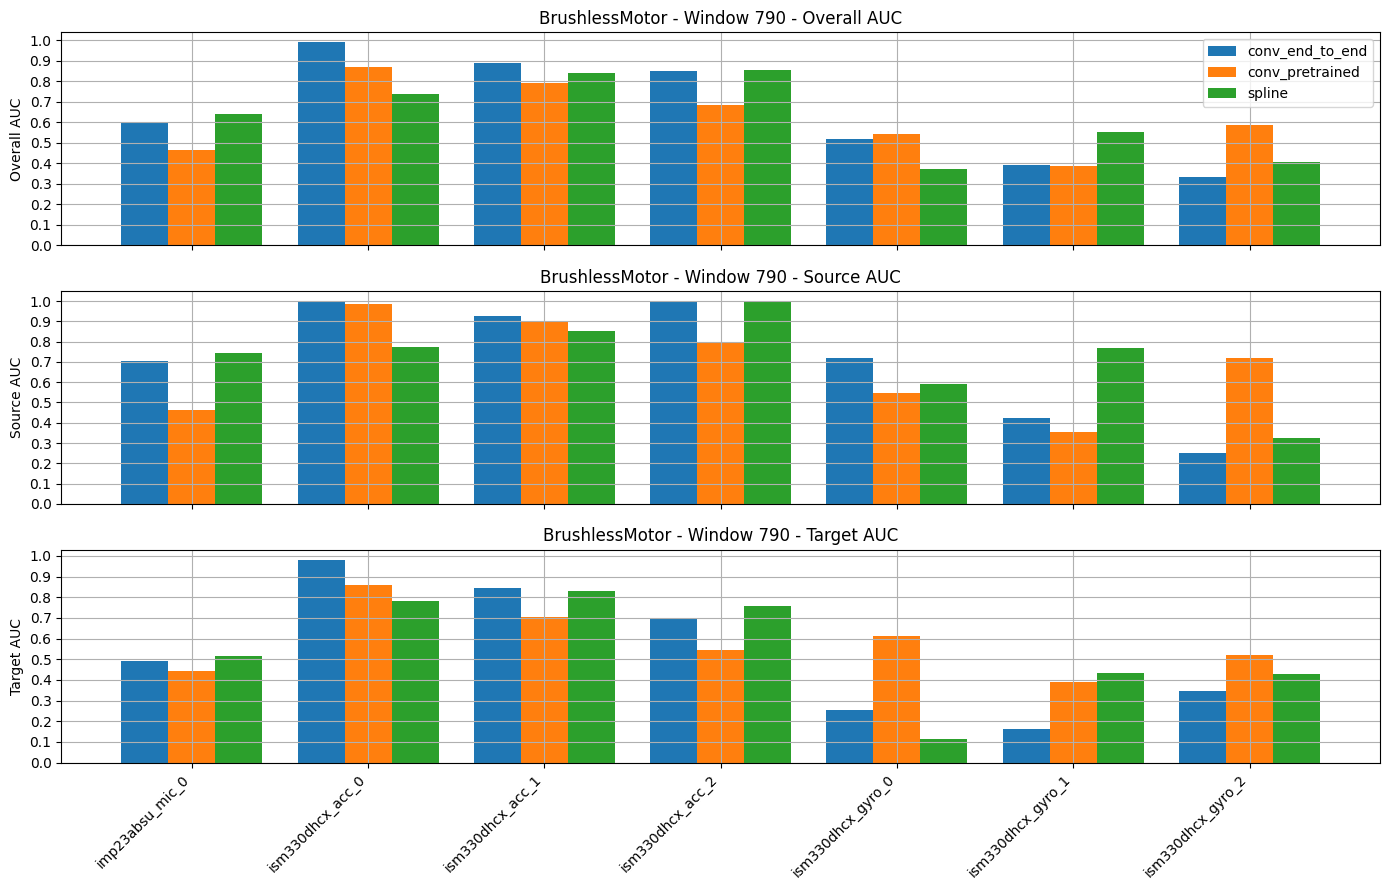

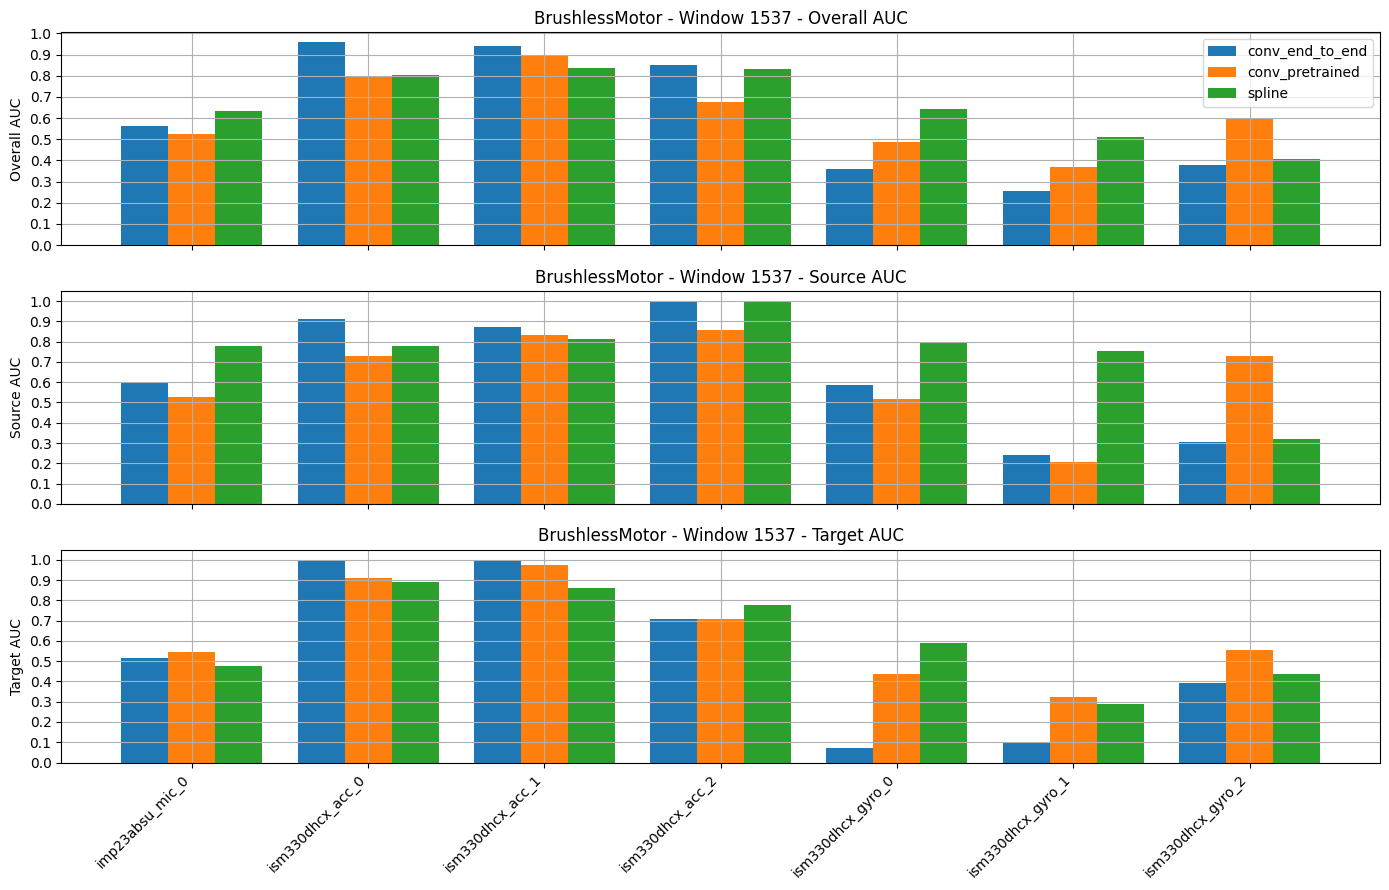

In [3]:
from matplotlib.ticker import MultipleLocator

WIDTH = 14
HEIGHT = 3
# Now create the plots
for machine, machine_dict in AUC.items():
    for window_length, model_dict in machine_dict.items():
        
        # Get the list of models for this machine-window_length combination
        models = list(model_dict.keys())
        
        # Use the first model's dataframe to extract sensor names (assuming consistent across models)
        first_model = models[0]
        df_first = model_dict[first_model]
        
        # Extract sensor names from the first model
        sensors = df_first['SensorName'].values
        x = np.arange(len(sensors))  # positions for the x-axis

        # Create a figure with 3 subplots (Overall, Source, Target) stacked vertically
        fig, axes = plt.subplots(3, 1, figsize=(WIDTH, HEIGHT*3), sharex=True)
        
        # The columns we want to plot in each of the 3 rows
        auc_cols = ["Overall", "Source", "Target"]
        row_titles = ["Overall AUC", "Source AUC", "Target AUC"]
        
        # Set up bar positions so the bars for different models don't overlap
        bar_width = 0.8 / len(models)  # adjust the fraction to control spacing
        offsets = np.arange(len(models)) * bar_width - (len(models) - 1) * bar_width / 2
        
        for i, (ax, auc_col) in enumerate(zip(axes, auc_cols)):
            # Plot each model's data as a bar for the given auc_col
            for j, model in enumerate(models):
                df = model_dict[model]
                
                ax.bar(x + offsets[j],
                       df[auc_col],
                       width=bar_width,
                       label=model)
            
            ax.set_ylabel(row_titles[i])
            ax.set_title(f"{machine} - Window {window_length} - {row_titles[i]}")
            ax.grid(True)  # Add grid
            
            # Set y-axis to 0.1 increments
            ax.yaxis.set_major_locator(MultipleLocator(0.1))
            
            # Only put the sensor names on the x-axis for the bottom plot
            if i == 2:  # bottom row
                ax.set_xticks(x)
                ax.set_xticklabels(sensors, rotation=45, ha='right')
            else:
                ax.set_xticks([])
        
        # Put the legend on the top subplot or create a single legend
        axes[0].legend()
        
        fig.tight_layout()

        # Save the figure to disk (or use plt.show() if you want to display)
        #plt.savefig(f"{machine}_{window_length}_AUC_comparison.png")
        #plt.close(fig)